In [1]:
import tensorflow as tf
from keras import datasets ,layers , models
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Activation, Dropout
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.callbacks import Callback, EarlyStopping
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

Here I have imported the required libraries and their necessary classes and functions<br>
I used tensorflow and keras <br>
I used 2-3 youtube videos whose links are mentioned below<br>
I also used a Github repo and its link is also cited <br>
video_1_url=(https://www.youtube.com/watch?v=7HPwo4wnJeA&list=PLXEFB4p186sFJeMjYbwojWHGTc7gHxHg4)
video_2_url=(https://www.youtube.com/watch?v=JcU72smpLJk&t=97s)
github_repo_url=(https://github.com/keras-team/keras-contrib/blob/master/examples/cifar10_resnet.py)

In [2]:
(x_train , y_train) , (x_test , y_test) = datasets.cifar10.load_data()
x_train.shape

170498071/170498071 [==============================] - 13s 0us/step


(50000, 32, 32, 3)

Here i have loaded the dataset CIFER and checked its number of images and size of each image

In [3]:
#y_train = y_train.reshape(-1,)
print(y_train.shape)
y_train[:5]


(50000, 1)


array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

Here i got to know that what is the shape of y_train and what values does it store

In [5]:
# number of classes
nb_classes = len(np.unique(y_train))
print(nb_classes)
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
print(len(classes))

10
10


Here I arranged the name of all the classes in dictionary order <br>
earlier I was planning to make a function to plot image using x_label as the name of image but uas unable to do it

In [6]:
# convert class vectors to binary class matrices
y_train = to_categorical(y_train, nb_classes)
y_test = to_categorical(y_test, nb_classes)

### convert class vectors to binary class matrices ###
before conversion

    |  y_train   |            |  y_test    |
    |   Sample 1 |     0      |   Sample 1 |     1     |
    |   Sample 2 |     1      |   Sample 2 |     2     |
    |   Sample 3 |     2      |   Sample 3 |     1     |
    |   Sample 4 |     0      |   Sample 4 |     0     |
    |   Sample 5 |     2      |   Sample 5 |     1     |

after conversion

                 |  y_train  |            |  y_test  |
              | Cat | Dog | Bird |   | Cat | Dog | Bird |
    Sample 1  |  1  |  0   |  0  |   |  0  |  1  |  0   |
    Sample 2  |  0  |  1   |  0  |   |  0  |  0  |  1   |
    Sample 3  |  0  |  0   |  1  |   |  0  |  1  |  0   |
    Sample 4  |  1  |  0   |  0  |   |  1  |  0  |  0   |
    Sample 5  |  0  |  0   |  1  |   |  0  |  1  |  0   |

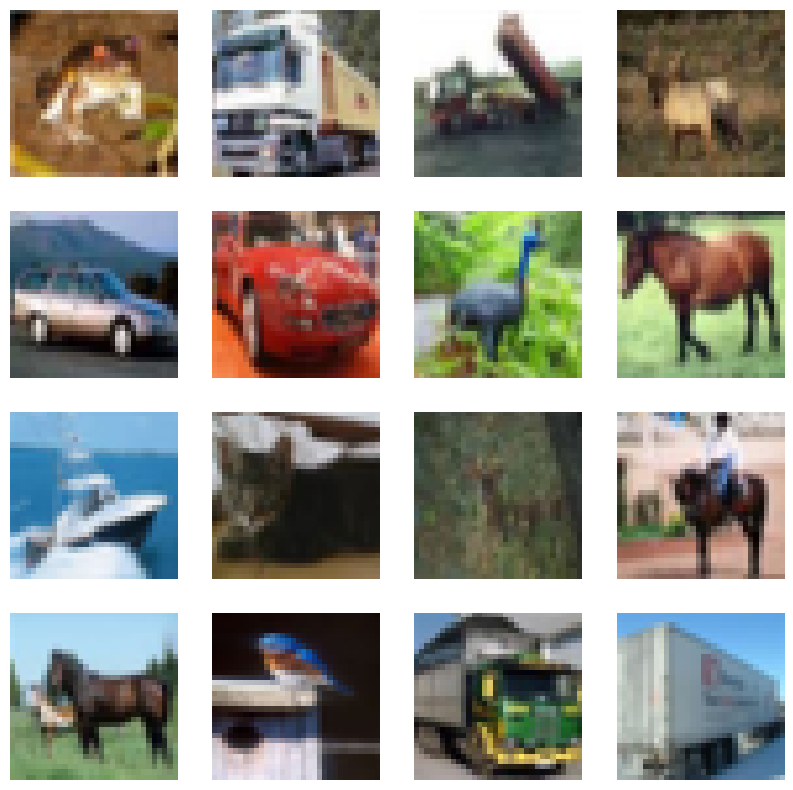

In [7]:
plt.figure(figsize=(10, 10))

for i in range (4*4):
  plt.subplot(4, 4, i+1)
  plt.imshow(x_train[i])
  plt.axis('off')

plt.show()

this is created to visualise the sample<br>
also to check that we are using the write sample or not<br>

In [8]:
x_train = x_train/255
x_test = x_test/255

It is done to normalise the dataset and it is divided by 255 as rgb has value from 0-255 for each color

In [9]:
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from keras.applications import ResNet50V2
from keras.applications import VGG16



cnn = Sequential()

# Load pre-trained model
# pre_model = tf.keras.applications.ResNet50(include_top=False,
#                                            weights='imagenet',
#                                            input_shape=(32,32,3),
#                                            pooling='avg',
#                                            classes=10)
# pre_model = tf.keras.applications.ResNet50V2(include_top=False,
#     weights="imagenet",
#     input_tensor=None,
#     input_shape=(32,32,3),
#     pooling='avg',
#     classes=100,
#     classifier_activation="softmax",
# )
pre_model = tf.keras.applications.VGG16(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(32,32,3),
    pooling='avg',
    classes=10
)

# # Freeze layers in the pre-trained model
# for layer in pre_model.layers:
#     layer.trainable = False

# Add layers to your model
cnn.add(pre_model)
cnn.add(Flatten())
cnn.add(Dense(1024, activation='elu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(128, activation='elu'))
cnn.add(Dropout(0.25))
cnn.add(Dense(10, activation='softmax'))

cnn.summary()

58889256/58889256 [==============================] - 4s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 1024)              525312    
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 128)               131200    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                         

Here I used VGG16 model as it was accuracy among all others

In [12]:
from  keras.optimizers.legacy import Adam
cnn.compile(loss=categorical_crossentropy, optimizer=Adam(learning_rate = 0.0001, decay = 1e-6), metrics=['accuracy'])

I am using kegacy optimizer Adam as new optimizer of Adam doesn't contain decay

In [13]:
datagen = ImageDataGenerator(
            featurewise_center=False,  # set input mean to 0 over the dataset
            samplewise_center=False,  # set each sample mean to 0
            featurewise_std_normalization=False,  # divide inputs by std of the dataset
            samplewise_std_normalization=False,  # divide each input by its std
            zca_whitening=False,  # apply ZCA whitening
            rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
            width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
            height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
            horizontal_flip=True,  # randomly flip images
            vertical_flip=False)  # randomly flip images

datagen.fit(x_train)

This is the part of the code that is copied from github repo and it helped to increased accuracy

In [14]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=8, restore_best_weights = True)

# Fit data to model
training = cnn.fit(datagen.flow(x_train, y_train, batch_size=50),
                   steps_per_epoch=x_train.shape[0] // 50,
                   epochs=500,
                   validation_data=(x_test, y_test),
                   verbose=1,
                   callbacks=[early_stop])

Epoch 1/500
1000/1000 [==============================] - 53s 46ms/step - loss: 1.0417 - accuracy: 0.6424 - val_loss: 0.7346 - val_accuracy: 0.7643
Epoch 2/500
1000/1000 [==============================] - 45s 45ms/step - loss: 0.6350 - accuracy: 0.7916 - val_loss: 0.5823 - val_accuracy: 0.8090
Epoch 3/500
1000/1000 [==============================] - 44s 44ms/step - loss: 0.5269 - accuracy: 0.8243 - val_loss: 0.5380 - val_accuracy: 0.8186
Epoch 4/500
1000/1000 [==============================] - 45s 45ms/step - loss: 0.4495 - accuracy: 0.8515 - val_loss: 0.4219 - val_accuracy: 0.8536
Epoch 5/500
1000/1000 [==============================] - 44s 44ms/step - loss: 0.3894 - accuracy: 0.8711 - val_loss: 0.4678 - val_accuracy: 0.8505
Epoch 6/500
1000/1000 [==============================] - 47s 47ms/step - loss: 0.3455 - accuracy: 0.8847 - val_loss: 0.4112 - val_accuracy: 0.8673
Epoch 7/500
1000/1000 [==============================] - 45s 45ms/step - loss: 0.3065 - accuracy: 0.8982 - val_loss: 0

Early stopping function is used so that whenever the validataion is lowest for next 8 values the epoch will stop and the model trainning will be complete<br>
I used batch size 50 as it was giving a better accuracy<br>

In [15]:
evaluation = cnn.evaluate(datagen.flow(x_test, y_test, batch_size=50),
                                      steps=x_test.shape[0] // 50)

print('Model Accuracy = %.3f' % (evaluation[1]))

200/200 [==============================] - 15s 70ms/step - loss: 0.4321 - accuracy: 0.8553
Model Accuracy = 0.855


This is the part where I tested the accuracy of the model and the accuracy turns out to be 85.5 % which is pretty good

Test loss: 0.3875892460346222 / Test accuracy: 0.8715000152587891


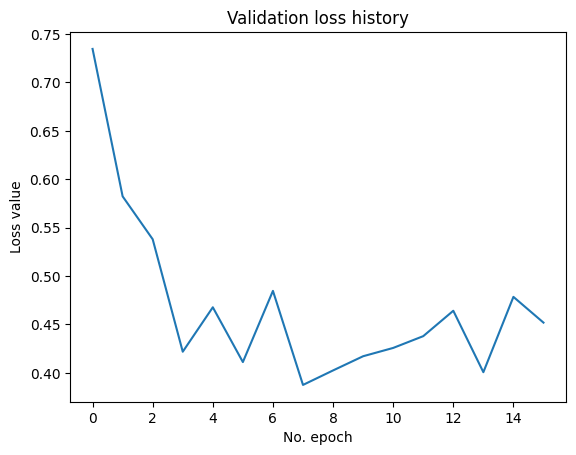

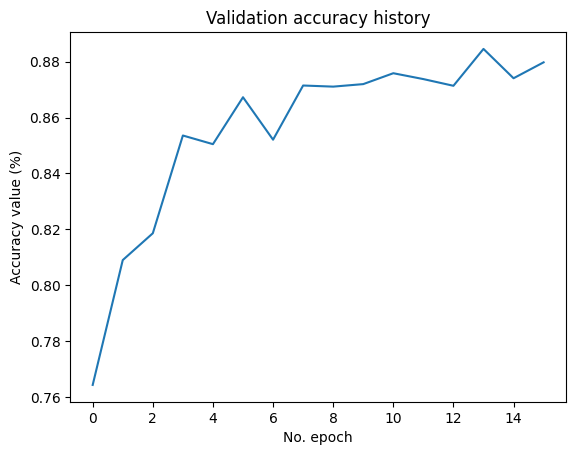

In [16]:
# Generate generalization metrics
score = cnn.evaluate(x_test, y_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

# Visualize history
# Plot history: Loss
plt.plot(training.history['val_loss'])
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

# Plot history: Accuracy
plt.plot(training.history['val_accuracy'])
plt.title('Validation accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()

These are the plots for validataion loss history vs no. of epoch and validataion accuracy history vs no. of epoch 